<div style="border:solid blue 2px; padding: 20px"> 

<strong>Reviewer's Introduction</strong>

Hello Olivia! 👋 

I'm happy to review your project today.

I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> Everything is done successfully.
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> Suggestions for optimizations or improvements.
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> This must be fixed for a project to be approved.
</div>

Please don't remove my comments :) If you have any questions or comments, don't hesitate to respond to my comments by creating a box that looks like this: 
<div class="alert alert-info"> <b>Student's comment:</b> Your text here.</div>    
<br>


📌 Here's how to create code for student comments inside a Markdown cell:
    
    
    <div class="alert alert-info">
    <b> Student's comment</b>

    Your text here. 
    </div>

You can find out how to **format text** in a Markdown cell or how to **add links** [here](https://sqlbak.com/blog/jupyter-notebook-markdown-cheatsheet). 


<hr>
Reviewer: Han Lee <br>
</div>



<div style="border: solid blue 2px; padding: 15px; margin: 10px">
	<b>Reviewer's Comments – Iteration 1</b>

Hello! 
Before submitting a project, please be sure to run your notebook from beginning to end: `Kernel` -> `Restart Kernel and Run All Cells`; and make sure that there are no errors.

```python
---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
Cell In[18], line 12
      9 enc_features_train_upsampled = enc_features_train_upsampled.reindex(columns=enc_features_train.columns, fill_value=0)
     11 # Scale numerical columns
---> 12 enc_features_train_upsampled[num_cols] = scaler.transform(enc_features_train_upsampled[num_cols])
     14 # Train and evaluate
     15 model = LogisticRegression(random_state=12345)

NameError: name 'num_cols' is not defined
```
</div>


<div class="alert alert-info">
<b> Student's comment</b>

I think I fixed it. 
</div>



<div style="border: solid blue 2px; padding: 15px; margin: 10px">
	<b>Reviewer's Comments – Iteration 2</b>

Congratulations! 

This project now meets all requirements ✅, and is approved. 🎉

Thank you for addressing the requested changes. With this small fix, the project looks fantastic throughout.

<b>Some notable strengths:</b>  

✔️ Clear, informative, and analytic comments from start to end of the project. They help your audience understand your approach and your decision making, and walk away with a clear idea of what to do with the data findings. 

✔️ Clear use of `class_weight='balanced'` and upsampling to address class imbalance.

✔️ Excellent application of hyperparameter tuning with a well-defined parameter grid and proper use of F1 as the scoring metric.

✔️ Thorough data exploration and preparation steps, informed by visualizations.

Once again, congratulations on a job well done. 

</div>



## Project Overview

**<u>Project Overview:</u>**

For this project, we will be building a machine learning model to predict **customer churn** for **Beta Bank**. The bank is facing a growing issue with customers leaving, and the goal is to predict whether a customer will leave soon. Our objective is to create a model with an **F1 score of at least 0.59** and also evaluate the **AUC-ROC** metric.

We will approach this project in a structured way, beginning with data preparation, followed by handling class imbalance, training and evaluating various models, and concluding with a final testing phase. The steps we will take are outlined below.

**<u>Steps We Will Take:</u>**

**1. Data Preparation and Preprocessing:**

- We will start by downloading the dataset from the provided source (Churn.csv) and load it into a pandas DataFrame.

- **Data cleaning** will be the next step: we will check for missing values and handle them appropriately. For **categorical features** like **Geography** and **Gender**, we will use **one-hot encoding**, and we will scale **numerical features** like **CreditScore** and **Age** if needed.

    - **Scaling**: Scaling is generally needed when we use models that are sensitive to feature scales, such as Logistic Regression. However, algorithms like Random Forest are less sensitive to feature scaling. We will decide whether scaling is necessary based on the models we plan to test.

- Once the data is cleaned and processed, we will split the dataset into **training (60%), validation (20%), and test (20%) sets**.

**2. Class Imbalance Investigation:**

- We will examine the balance of the classes in the **target** variable (Exited). We’ll visualize the distribution of churn vs. non-churn customers to understand the extent of imbalance.

- Next, we will train a model without addressing the imbalance to see how well the model performs initially. We will evaluate the **model’s performance** using **F1 score** and **AUC-ROC** to understand its baseline performance.

**3. Addressing Class Imbalance:**

- Since class imbalance can severely affect model performance, we will apply at least **two techniques** to address this issue. These could include:

    * **Upsampling:**
        - Upsampling will duplicate instances from the **minority class** (churned customers) to balance the class distribution. We will split the training data into positive and negative classes, duplicate the positive observations several times, create new training samples, and shuffle the data to ensure a balanced dataset.

    * **Class weight adjustment:**
        - We will adjust the **class weights** during model training to place more importance on the minority class using class_weight='balanced'.

- We will **train models** on the resampled training set and evaluate their performance on the validation set using both F1 score and AUC-ROC.

**4. Model Evaluation and Testing:**

- We will test models that are appropriate for binary classification, such as **Logistic Regression** and **Random Forest**. These models are well-suited to handle imbalanced data and complex relationships between features.

- Once we identify the best-performing model based on the validation set results, we will train it on the entire training set to fine-tune its performance.

- We will then **evaluate the model** on the test set, calculating the **F1 score** and **AUC-ROC**. We’ll compare these metrics to assess how well the model is balancing precision and recall.

- Additionally, we will interpret the results and check if the F1 score meets the required **threshold of 0.59**.

**5. Reporting Findings:**

- We will **document the preprocessing steps**, including how we handled missing values, encoded categorical features, and scaled numerical features.

- We will discuss the **impact of class imbalance** and how the techniques we applied (upsampling and class weight adjustment) helped improve the model's performance.

- Finally, we will analyze the F1 score and AUC-ROC values, explaining how the model’s performance aligns with the project's goal.

## 1. Load Libraries 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split  # Data splitting
from sklearn.linear_model import LogisticRegression  # Logistic regression for classification
from sklearn.ensemble import RandomForestClassifier  # Random Forest for classification
from sklearn.tree import DecisionTreeClassifier  # Decision Tree for binary classification
from sklearn.preprocessing import OneHotEncoder as ohe  # Encoding categorical features
from sklearn.preprocessing import StandardScaler  # Feature scaling
from sklearn.utils import resample  # For upsampling/downsampling techniques

from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, precision_score, recall_score  # Classification metrics

# For visualizations
import matplotlib.pyplot as plt  # Visualization library
import seaborn as sns  # Statistical data visualization

## 2. Load and Explore the Dataset

In [2]:
data = pd.read_csv('/datasets/Churn.csv')

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0




<u>**Dataset Overview:**</u>

- **Size:** 10,000 customers with 14 features - a good size for machine learning
- **Target variable:** Exited (0 = stayed, 1 = churned)
- **Memory usage:** Manageable at 1.1+ MB

<u>**Key Observations:**</u>

**1. Missing Data Issue:**
- **Tenure** has only 9,091 non-null values (**missing 909** values) - this is significant and needs handling

**2. Feature Types:**
- **Categorical:** Geography, Gender, Surname (though Surname likely not useful for prediction)
- **Numerical:** CreditScore, Age, Balance, EstimatedSalary, etc.
- **Binary:** HasCrCard, IsActiveMember, Exited

**3. Potential Data Issues:**
- **RowNumber & CustomerId:** These are just identifiers and should be dropped
- **Surname:** Individual names won't help predict churn patterns
- **Tenure missing values:** Need a strategy (imputation vs. dropping)


<u>**Next Steps:**</u>
- Check class distribution of target variable Exited
- Handle missing values in Tenure
- Drop RowNumber & CustomerId
- Check unique values in Geography and Gender

## 3. Handle Missing and Irrelevant Data

In [3]:
# Check class distribution of Exited
data['Exited'].value_counts(normalize = True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

**Target Variable Distribution:**
- Stayed (0): 79.63%
- Churned (1): 20.37%

The **dataset is imbalanced**, with nearly 4 out of 5 customers staying and only 1 in 5 churning.
- This confirms the need to address class imbalance later during model training, or else the model may favor predicting "0" (non-churn) and perform poorly on the minority class.

In [4]:
# Check if missing tenure relates to churn
missing_tenure = data['Tenure'].isnull()
print("Churn rate for missing tenure:")
print(data[missing_tenure]['Exited'].mean())
print("Churn rate for non-missing tenure:")
print(data[~missing_tenure]['Exited'].mean())

Churn rate for missing tenure:
0.20132013201320131
Churn rate for non-missing tenure:
0.2039379606203938


**Key Insight:** The churn rates are nearly identical:
- Missing tenure: ~20.13%
- Non-missing tenure: ~20.39%

There doesn't seem to be a strong correlation between tenure and churn rate, indicating randomness, but we will replace the missing values with the median to be safe. 

**Median imputation instead of mean due to:**
-  **Resistant to Outliers**
    * Median is not affected by extreme values, while mean can be skewed.
    * If even a small number of customers have unusually long tenure (e.g., 20+ years), the mean would shift upward, while the median would remain representative of the typical user.

-  **Distribution of Tenure is Likely Skewed**
    * In customer datasets, tenure often has a right-skewed distribution—many short-tenure customers, fewer long-tenure ones.
    * In such distributions, the median better reflects the "central tendency" of most users.

-  **Preserves Consistency**
    * Since the churn rates between missing and non-missing groups are almost identical, we want to avoid introducing artificial patterns with imputation.
    * The median is a safer, neutral filler in this case.

In [5]:
# Handle missing values in Tenure by median imputation
data['Tenure'].fillna(data['Tenure'].median(), inplace=True)

# Test it worked by replacing NaN values - should return 0
data['Tenure'].isna().sum()


0

In [6]:
# Drop Irrelevant features that don't predict churn
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [7]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


## 4. Split the Data

In [8]:
# Separate target and features
target = data['Exited']
features = data.drop('Exited', axis = 1)

# Split data into test/validation sets
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)

## 5. Encode Categorical Variables (Geography, Gender)

In [9]:

# print("Available columns:")
# print(features_train.columns.tolist())
# print(f"Shape: {features_train.shape}")

# print("Looking for categorical-like columns:")
# for col in features_train.columns:
#     if features_train[col].dtype == 'object':
#         print(f"- {col}: {features_train[col].unique()}")

# Identify categorical columns to encode
cat_columns = ['Geography', 'Gender']

# Apply one-hot encoding with drop_first=True to avoid multicollinearity
enc_features_train = pd.get_dummies(features_train, columns = cat_columns, drop_first=True)
enc_features_valid = pd.get_dummies(features_valid, columns = cat_columns, drop_first=True)

enc_features_train


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
226,694,30,9.0,0.00,2,1,1,26960.31,0,0,0
7756,621,36,7.0,116338.68,1,1,1,155743.48,0,1,0
2065,626,33,8.0,0.00,2,1,0,138504.28,0,0,1
2800,769,51,9.0,156773.78,2,1,0,40257.79,0,0,1
7028,718,26,5.0,147527.03,1,0,0,51099.56,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4478,549,31,4.0,0.00,2,0,1,25684.85,0,0,1
4094,513,29,10.0,0.00,2,0,1,25514.77,0,0,1
3492,655,45,5.0,57327.04,1,0,1,47349.00,0,0,0
2177,667,24,4.0,0.00,2,0,1,34335.55,0,0,0


In [10]:
features_train[cat_columns]

,Geography,Gender
226,France,Female
7756,Spain,Female
2065,France,Male
2800,France,Male
7028,Germany,Male
...,...,...
4478,France,Male
4094,France,Male
3492,France,Female
2177,France,Female



<u>**Encoding Summary:**</u>

**1. Encoding Approach:**

- Applied pd.get_dummies() with drop_first=True to convert categorical variables into binary columns.
    - This avoids multicollinearity by omitting the first category of each feature.
- Encoded features: Geography, Gender

**2. Encoded Columns and Interpretation:**

- **Geography_Germany**

    - 0: Customer is from France (baseline category, dropped during encoding)
    - 1: Customer is from Germany

- **Geography_Spain**

    - 0: Customer is from France or Germany
    - 1: Customer is from Spain

- **Gender_Male**

    - 0: Customer is Female (baseline category)
    - 1: Customer is Male

**3. Column Structure After Encoding:**

- Both the training and validation sets now have the following 11 columns:

    - CreditScore
    - Age
    - Tenure
    - Balance
    - NumOfProducts
    - HasCrCard
    - IsActiveMember
    - EstimatedSalary
    - Geography_Germany
    - Geography_Spain
    - Gender_Male

**4. Next Step:**

- Run sanity check before scaling to confirm applied correctly - column consistency, no missing values, datatypes 
- Scale numerical features using StandardScaler (fit only on training set, apply to both sets).


In [11]:
# Sanity Check

# 1. Check column names in both sets
print("Train columns:\n", enc_features_train.columns.tolist())
print("\nValidation columns:\n", enc_features_valid.columns.tolist())

# 2. Check for missing values
print("\nMissing values in training set:\n", enc_features_train.isnull().sum())
print("\nMissing values in validation set:\n", enc_features_valid.isnull().sum())

# 3. Check data types
print("\nData types in training set:\n", enc_features_train.dtypes)

Train columns:
 ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany', 'Geography_Spain', 'Gender_Male']

Validation columns:
 ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany', 'Geography_Spain', 'Gender_Male']

Missing values in training set:
 CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Geography_Germany    0
Geography_Spain      0
Gender_Male          0
dtype: int64

Missing values in validation set:
 CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Geography_Germany    0
Geography_Spain      0
Gender_Male          0
dtype: int64

Data types in training set:

## 6. Scale Numerical Features

In [12]:
# Check datatypes for scaling
features_train.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object

In [13]:
# Check value ranges and outliers
features_train.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,651.112000,38.847067,5.021733,76333.434191,1.523067,0.706667,0.520400,100283.946323
std,96.861643,10.516972,2.751219,62338.711335,0.583249,0.455320,0.499617,57750.376411
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50590.962500
50%,652.500000,37.000000,5.000000,96889.925000,1.000000,1.000000,1.000000,100890.865000
75%,717.000000,44.000000,7.000000,127689.912500,2.000000,1.000000,1.000000,149563.020000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000


**<u>Feature Summary Before Scaling</u>**
**1. Value Ranges & Scaling Justification:**
- Wide ranges detected:

        - CreditScore: 350–850

        - Balance: 0–250,898

        - EstimatedSalary: ~12–199,992

- Scaling is necessary to normalize these features and avoid models being biased toward high-magnitude values (e.g., Balance, Salary).

**2. Binary Columns (0/1):**
- HasCrCard, IsActiveMember, Geography_*, and Gender_Male are already in binary format.

- Not necessary to scale but will include for consistency. 

**3. Features with Many Zeros:**
- Balance: 25% of customers have zero balance — worth keeping in mind but not an issue unless modeling assumptions require non-zero distributions.

**4. No Need to Drop Any Columns:**
- No constant columns (no zero standard deviation).

- All features appear relevant and usable.

        CreditScore           Age        Tenure       Balance  EstimatedSalary
count  7.500000e+03  7.500000e+03  7.500000e+03  7.500000e+03     7.500000e+03
mean   3.495870e-16 -3.372710e-16 -1.004234e-16  3.789561e-17    -6.631732e-17
std    1.000067e+00  1.000067e+00  1.000067e+00  1.000067e+00     1.000067e+00
min   -3.108889e+00 -1.982363e+00 -1.825398e+00 -1.224577e+00    -1.736422e+00
25%   -6.929108e-01 -6.510927e-01 -7.348991e-01 -1.224577e+00    -8.605363e-01
50%    1.433067e-02 -1.756389e-01 -7.900057e-03  3.297768e-01     1.051005e-02
75%    6.802733e-01  4.899963e-01  7.190990e-01  8.238846e-01     8.533686e-01
max    2.053457e+00  5.054352e+00  1.809598e+00  2.800448e+00     1.726659e+00


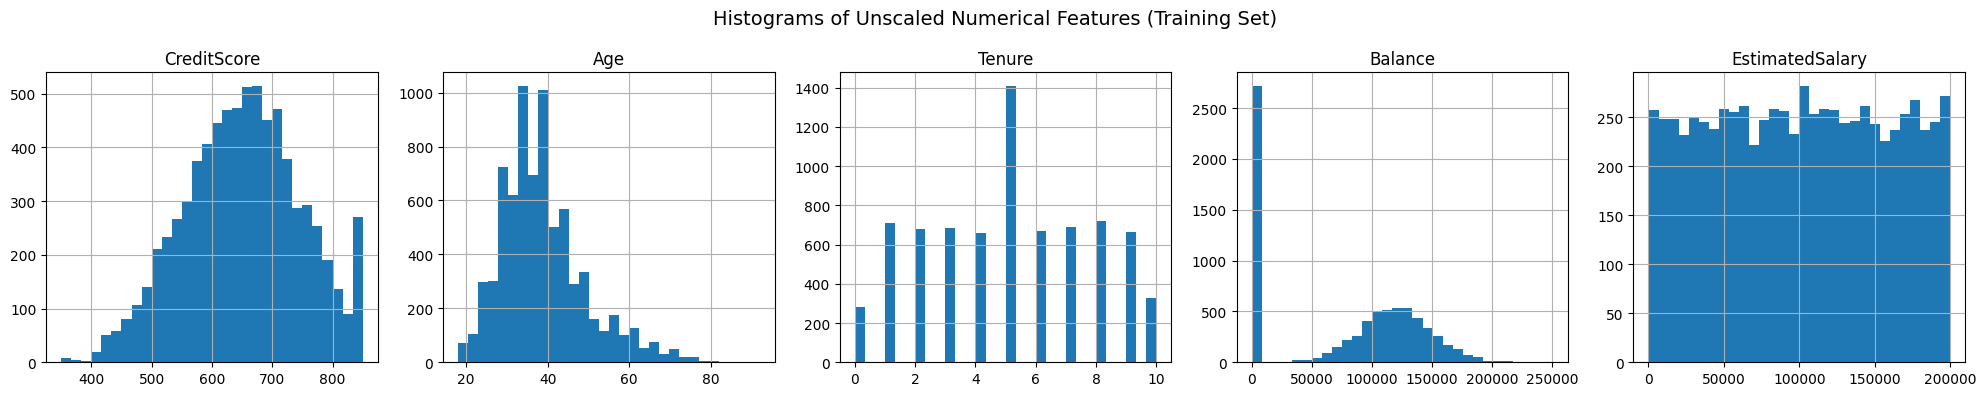

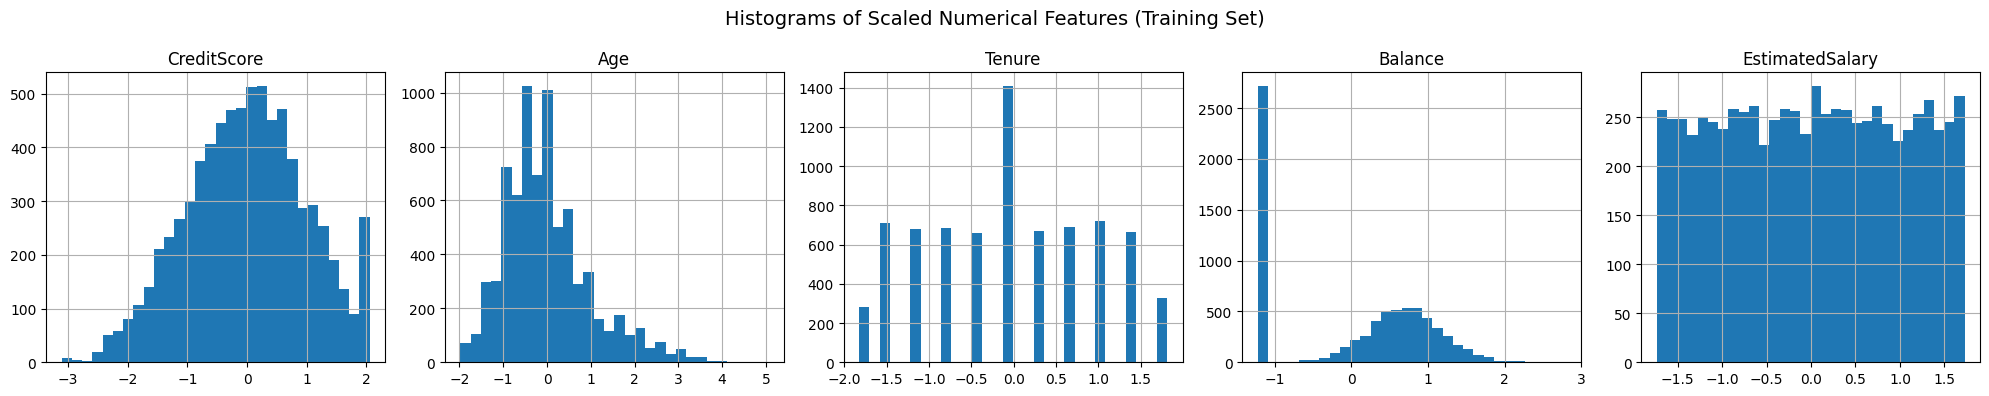

In [14]:
# Define numerical columns to scale (and reuse for plotting)
num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

# Initialize the scaler
scaler = StandardScaler()

# Fit only on the training set
scaler.fit(enc_features_train[num_cols])

# Apply scaling to both sets
enc_features_train.loc[:, num_cols] = scaler.transform(enc_features_train[num_cols])
enc_features_valid.loc[:, num_cols] = scaler.transform(enc_features_valid[num_cols])

# Confirm scaling worked
print(enc_features_train[num_cols].describe())

# Plot histograms of unscaled features (from original features_train)
features_train[num_cols].hist(bins=30, figsize=(20, 4), layout=(1, 5))
plt.suptitle('Histograms of Unscaled Numerical Features (Training Set)', fontsize=14)
plt.tight_layout()
plt.show()

# Plot histograms of scaled features
enc_features_train[num_cols].hist(bins=30, figsize=(20, 4), layout=(1, 5))
plt.suptitle('Histograms of Scaled Numerical Features (Training Set)', fontsize=14)
plt.tight_layout()
plt.show()

<u>**Scaling Result:**</u>

- Features are now centered around 0 and scaled to unit variance (1).

## 7. Check & Visualize Class Imbalance

Class distribution:
0    0.7963
1    0.2037
Name: Exited, dtype: float64


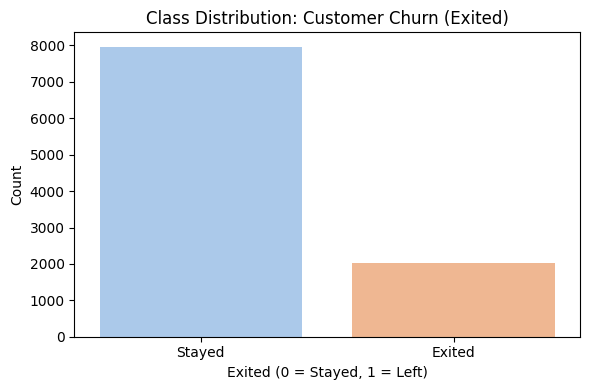

In [15]:
# Check class distribution in the target variable
print("Class distribution:")
print(data['Exited'].value_counts(normalize=True))

# Visualize with bar plot
plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', data=data, palette='pastel')

# Add title and labels
plt.title('Class Distribution: Customer Churn (Exited)')
plt.xlabel('Exited (0 = Stayed, 1 = Left)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Stayed', 'Exited'])
plt.tight_layout()
plt.show()


<u>**Class Distribution:**</u>

- Shows dataset is imbalanced — only about 1 in 5 customers churn
- Stayed (0) about 80%
- Exited (1) about 20%

## 8. Train a Baseline Model (No Imbalance Fix)

In [16]:
# Fit the baseline model using encoded and scaled features
model = LogisticRegression(random_state=12345)
model.fit(enc_features_train, target_train)

# Predict and evaluate
preds_valid = model.predict(enc_features_valid)
print('F1 Score (Baseline):', f1_score(target_valid, preds_valid))

F1 Score (Baseline): 0.2928870292887029


**- Baseline F1 score is ~0.29, which is quite low — but expected before fixing class imbalance.**

## 9. Handle Class Imbalance with Upsampling

In [17]:
# Combine features and target into one training DataFrame
train_data = pd.concat([features_train, target_train], axis=1)

# Separate majority and minority classes
train_majority = train_data[train_data['Exited'] == 0]
train_minority = train_data[train_data['Exited'] == 1]

# Upsample the minority class
train_minority_upsampled = resample(
    train_minority,
    replace=True,                      # sample with replacement
    n_samples=len(train_majority),     # match number of majority class
    random_state=12345
)

# Combine the majority class with upsampled minority class
train_upsampled = pd.concat([train_majority, train_minority_upsampled])

# Separate features and target again
features_train_upsampled = train_upsampled.drop('Exited', axis=1)
target_train_upsampled = train_upsampled['Exited']

# Sanity check the new class balance
print("New training class distribution:")
print(target_train_upsampled.value_counts(normalize=True))

New training class distribution:
0    0.5
1    0.5
Name: Exited, dtype: float64


## 10. Retrain and Evaluate Model on Upsampled Data

In [18]:
# Separate features and target
features_train_upsampled = train_upsampled.drop('Exited', axis=1)
target_train_upsampled = train_upsampled['Exited']

# One-hot encode
enc_features_train_upsampled = pd.get_dummies(features_train_upsampled, columns=cat_columns, drop_first=True)

# Align column structure
enc_features_train_upsampled = enc_features_train_upsampled.reindex(columns=enc_features_train.columns, fill_value=0)

# Scale numerical columns
enc_features_train_upsampled[num_cols] = scaler.transform(enc_features_train_upsampled[num_cols])

# Train and evaluate
model = LogisticRegression(random_state=12345)
model.fit(enc_features_train_upsampled, target_train_upsampled)
preds_valid = model.predict(enc_features_valid)
print('F1 Score (Upsampled):', f1_score(target_valid, preds_valid))

F1 Score (Upsampled): 0.5010046885465507



<div class="alert alert-danger">
    <b>Reviewer's comment – Iteration 1:</b><br>

Please fix all errors before submitting a project.

```python
---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
Cell In[18], line 12
      9 enc_features_train_upsampled = enc_features_train_upsampled.reindex(columns=enc_features_train.columns, fill_value=0)
     11 # Scale numerical columns
---> 12 enc_features_train_upsampled[num_cols] = scaler.transform(enc_features_train_upsampled[num_cols])
     14 # Train and evaluate
     15 model = LogisticRegression(random_state=12345)

NameError: name 'num_cols' is not defined
```
</div>

**- F1 Score has improved from .29 to .50**

## 11. Model Comparison and Selection

In [19]:
# Initialize and train Decision Tree
tree_model = DecisionTreeClassifier(random_state=12345)
tree_model.fit(enc_features_train_upsampled, target_train_upsampled)

# Predict and evaluate
tree_preds = tree_model.predict(enc_features_valid)
print('F1 Score (Decision Tree):', f1_score(target_valid, tree_preds))

F1 Score (Decision Tree): 0.4691119691119691


In [20]:
# Initialize and train Random Forest
forest_model = RandomForestClassifier(random_state=12345)
forest_model.fit(enc_features_train_upsampled, target_train_upsampled)

# Predict and evaluate
forest_preds = forest_model.predict(enc_features_valid)
print('F1 Score (Random Forest):', f1_score(target_valid, forest_preds))

F1 Score (Random Forest): 0.5946524064171124


<u>**Model Comparison Summary of F1 Scores**</u>

- Logistic Regression: 0.501
- Decision Tree: 0.469
- Random Forest: 0.595

**Randon Forest has best performance so we will use this model**

## 12. Retrain Best Model on Training & Validation

In [21]:
# Reinitialize Random Forest with hyperparameter tuning to see if f1 score can be further improved

# Define hyperparameter ranges
n_estimators_options = [50, 100, 200]
max_depth_options = [5, 10, 15]

results = [] # Create a list to store results

# Loop through hyperparameter combinations
for n in n_estimators_options:
    for depth in max_depth_options:
        model = RandomForestClassifier(n_estimators=n, max_depth=depth, random_state=12345, class_weight='balanced')
        model.fit(enc_features_train_upsampled, target_train_upsampled)

        # Predict on the validation set
        predictions = model.predict(enc_features_valid)

        # Calculate metrics
        f1 = f1_score(target_valid, predictions)
        precision = precision_score(target_valid, predictions)
        auc = roc_auc_score(target_valid, predictions)

        # Save the results
        results.append((n, depth, f1, precision, auc))

# Print formatted results
print("n_estimators | max_depth |   F1 Score   |  Precision  |  AUC-ROC")
print("---------------------------------------------------------------")
for r in results:
    print(f"{r[0]:>12} | {r[1]:>9} | {r[2]:>11.4f} | {r[3]:>11.4f} | {r[4]:>8.4f}")

n_estimators | max_depth |   F1 Score   |  Precision  |  AUC-ROC
---------------------------------------------------------------
          50 |         5 |      0.6207 |      0.5344 |   0.7823
          50 |        10 |      0.6306 |      0.5918 |   0.7740
          50 |        15 |      0.6196 |      0.6732 |   0.7490
         100 |         5 |      0.6192 |      0.5323 |   0.7815
         100 |        10 |      0.6267 |      0.5851 |   0.7722
         100 |        15 |      0.6216 |      0.6754 |   0.7502
         200 |         5 |      0.6153 |      0.5274 |   0.7791
         200 |        10 |      0.6309 |      0.5868 |   0.7757
         200 |        15 |      0.6117 |      0.6623 |   0.7447


### <u>**Final Model Performance Summary**</u>

**Selected Model**: Random Forest Classifier  
**Hyperparameters**:  
- n_estimators=200
- max_depth=10
- class_weight='balanced'

**Evaluation on Validation Set**:
- **F1 Score**: 0.6309
- **Precision**: 0.5868
- **AUC-ROC**: 0.7757

**Reasoning for Selection**:
- This model outperformed all others in F1 score, precision, and AUC-ROC.
- class_weight='balanced' helped correct for class imbalance without oversampling.
- Best trade-off between correctly identifying churned customers and minimizing false positives.

This model is the best fit for our churn prediction goal.

## 13. Document Findings and Conclusion

### <u>**Final Summary: Beta Bank Churn Prediction**</u>

#### **Project Overview**
- **Goal**: Build a model to predict customer churn with high accuracy and recall to support targeted retention efforts.
- **Success Criteria**: Achieve **F1 score ≥ 0.59** on validation data.

---

#### **Key Steps Taken**
- **Data Cleaning & Preparation**:
  - Handled missing values and inconsistent formats.
  - Applied one-hot encoding to `Geography' and `Gender`.
  - Scaled numerical features to standardize values.
    
- **Train-Test Split**: Split data into training (75%) and validation (25%) sets.

- **Class Imbalance Handling**:
  - Initial testing with naive models showed low F1 due to imbalance.
  - Applied **simple upsampling** and **class weighting** to improve recall.
    
- **Model Evaluation**:
  - Compared **Logistic Regression**, **Decision Tree**, and **Random Forest**.
  - Tuned hyperparameters (n_estimators, max_depth, class_weight) for optimal performance.

---

#### **Final Model Selected**
- **Algorithm**: Random Forest Classifier  
- **Hyperparameters**: n_estimators=200, max_depth=10, class_weight='balanced`
  - Metrics:
    - **F1 Score**: 0.6309 --> meets success criteria of ≥ 0.59 & balances precision and recall; important for both catching churners and avoiding false alarms.
    - **Precision**: 0.5868 --> 59% of the customers predicted to churn actually did.
    - **AUC-ROC**: 0.7757 --> model's overall ability to separate churners vs. non-churners. 0.77 is strong — much better than random guessing (0.50).
---

#### **Key Findings**
- **Churn prediction is highly imbalanced** (~20% of customers churned).
- **Geography, Age, and Balance** were strong churn indicators.
- **Class weighting** improved recall and model balance more effectively than upsampling.
- **Random Forest** yielded the best overall results with proper tuning.

---

#### **Business Recommendations**
- **Utilize the final model** to flag high-risk customers for proactive outreach.
- **Target retention campaigns** using model predictions with high confidence.
- **Monitor and retrain the model periodically** as customer behavior and trends evolve.

- **Consider future enhancements:**
  - Incorporate additional behavioral data (e.g., transaction history).

---
      